># **IBM Course: DA0101EN**
>**Data Analysis with Python**
> 
> *Fernando Alfredo Rojas Estrella - A01685424*
> 
> **Temas:**
1. Model Evaluation and Refinement 0:22
2. Model Evaluation 7:31
3. Overfitting, Underfitting and Model Selection 4:21
4. Ridge Regression 4:27
5. Grid Search 4:34

In [1]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 1

# Model Evaluation and Refinement

import pandas as pd
import numpy as np
#import piplite
#import micropip
import pandas
import matplotlib
import scipy
import seaborn as sn
import ipywidgets
import tqdm

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"
dfdat = pd.read_csv(URL)
df = dfdat
#URL2= 'https://themys.sid.uncu.edu.ar/rpalma/R-cran/Herederos.csv'
#URL3= "https://themys.sid.uncu.edu.ar/rpalma/R-cran/MDZ_Competitividad.csv"
#df = pd.read_csv(URL2, delimiter=';', decimal=b',')

print('Dataframe:\n',df.head(4))

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
df=df._get_numeric_data()
print('Dataframe:\n',df.head(4))


print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)


Dataframe:
    Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses         make  \
0           0             0          3                122  alfa-romero   
1           1             1          3                122  alfa-romero   
2           2             2          1                122  alfa-romero   
3           3             3          2                164         audi   

  aspiration num-of-doors   body-style drive-wheels engine-location  ...  \
0        std          two  convertible          rwd           front  ...   
1        std          two  convertible          rwd           front  ...   
2        std          two    hatchback          rwd           front  ...   
3        std         four        sedan          fwd           front  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0       111.0    5000.0        21           27  13495.0   
1                9.0       111.0    5000.0        21           27  16500.0   
2 

In [2]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 1 - Definición de funciones

from ipywidgets import interact, interactive, fixed, interact_manual

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()


print('\n- - - - - - - - - - - - - - - - - - - - - \n')
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()




- - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - 



In [3]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 1 - Entrenando y probando

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_data = df['price']
x_data=df.drop('price',axis=1)

print('\n- - - - - - - - - - - - - - - - - - - - - \n') # Con corte de prueba al 40%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=0)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

print('\n- - - - - - - - - - - - - - - - - - - - - \n') # Regresión lineal
lre=LinearRegression() # Creating object
lre.fit(x_train[['horsepower']], y_train) # Fit de model
lre.score(x_test[['horsepower']], y_test) # Calculando R^2
print('lre.score(x_test[[horsepower]], y_test):\n',lre.score(x_test[['horsepower']], y_test))
lre.score(x_train[['horsepower']], y_train) # Utilizando el conjunto de prueba
print('lre.score(x_train[[horsepower]], y_train):\n',lre.score(x_train[['horsepower']], y_train))

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)


- - - - - - - - - - - - - - - - - - - - - 

number of test samples : 81
number of training samples: 120

- - - - - - - - - - - - - - - - - - - - - 

lre.score(x_test[[horsepower]], y_test):
 0.7139364665406973
lre.score(x_train[[horsepower]], y_train):
 0.5754067463583004

- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:



In [34]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 2

# Model Evaluation

from sklearn.model_selection import cross_val_score


print('\n- - - - - - - - - - - - - - - - - - - - - \n')
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

print('Rcross:\n',Rcross)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')
print('cross val score:\n',-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error'))
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n') #Ejercicio
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()
print(':\n',)
print(':\n',)


- - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - 

Rcross:
 [0.7746232  0.51716687 0.74785353 0.04839605]
:


- - - - - - - - - - - - - - - - - - - - - 

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603
cross val score:
 [20254142.84026702 43745493.2650517  12539630.34014931 17561927.72247591]
:


- - - - - - - - - - - - - - - - - - - - - 

:

:




- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


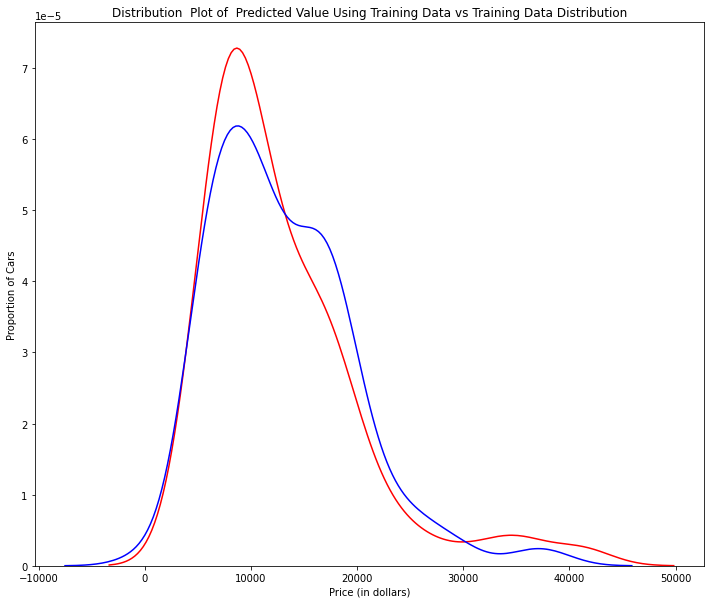

y_train):
 46     36000.0
138     7775.0
196    16845.0
108    15580.0
62     18280.0
        ...   
67     31600.0
192    15985.0
117     6229.0
47      5195.0
172    10898.0
Name: price, Length: 120, dtype: float64
y_hat_train:
 [38237.3225152   8757.67570728 16832.43125207 16093.28264058
 14757.89820098 16938.1932302  11364.42124558  9060.87535587
 19682.24002746 13528.01220435 10356.61040218 17013.49740674
  5562.01854305 17821.13832503  8305.10486885 19738.7327075
 13430.48529418  6306.61624457 16105.8802367   7604.35938049
 17425.54886444  5682.96521284 13101.80794733  6784.00359112
 17612.24237959  6574.2424843  23969.94952455 15483.78829064
  9757.69096788 29051.44101354  5393.63954826  5357.47384019
 10653.23318962 19267.88697694  8768.63097682  5770.39854894
  9100.45276205  8192.89836215  5114.83503642 25226.54238258
 10796.49882545 15708.05744792  7518.36891141 20718.14367494
  7838.5501273  10015.96689082  7715.58671986 14196.28908329
 18984.72238825 15664.92549402 29449.2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


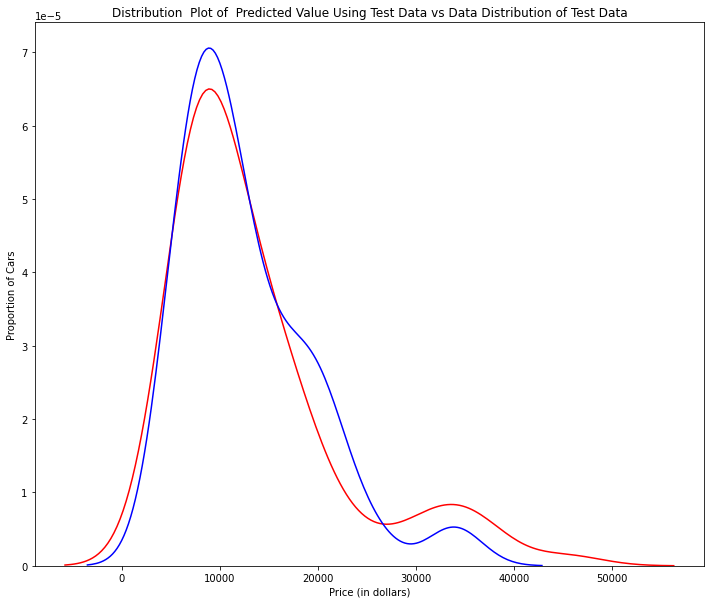

In [29]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 3

# Overfitting.

from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Calculando predicción 
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
print(':\n',)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]
print(':\n',)
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
print('y_train):\n',y_train)
print('y_hat_train:\n',yhat_train)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)


- - - - - - - - - - - - - - - - - - - - - 

pr:
 PolynomialFeatures(degree=5)
:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]
:

PollyPlot:
 None

- - - - - - - - - - - - - - - - - - - - - 

:


- - - - - - - - - - - - - - - - - - - - - 

Probando con R2:



Text(3, 0.75, 'Maximum R^2 ')

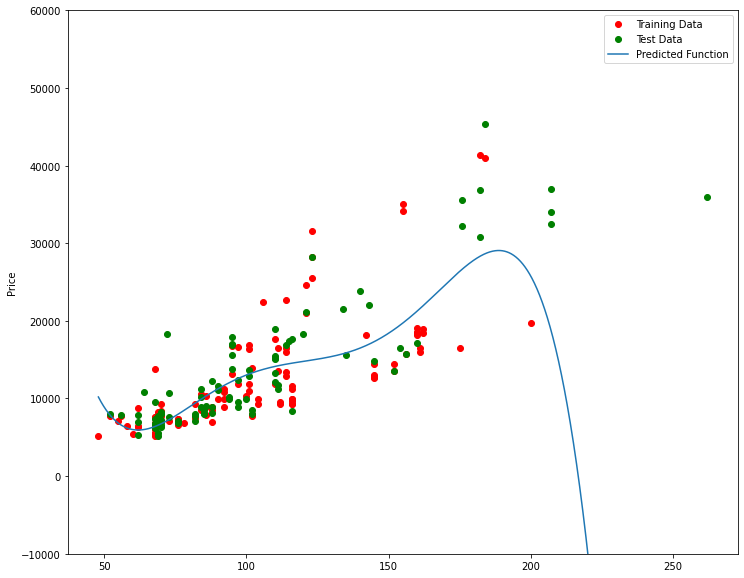

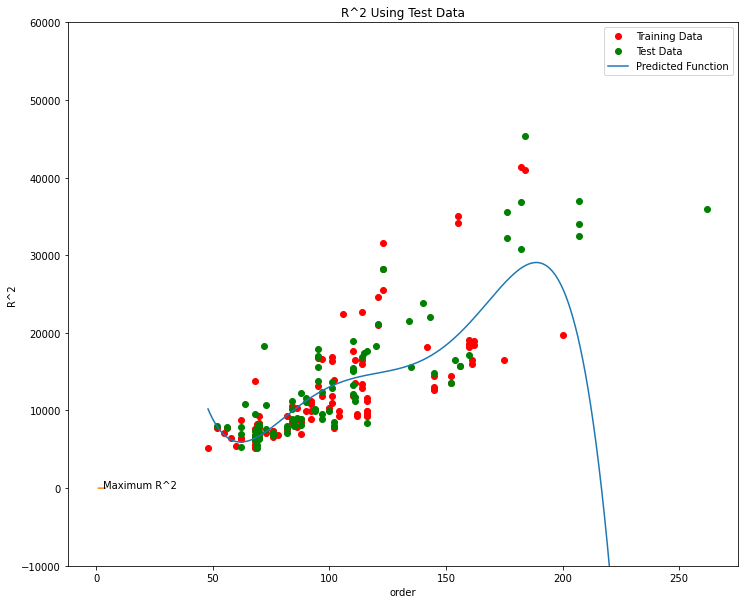

In [42]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 3

# Underfitting and Model Selection

from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
print('pr:\n',pr)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
print(':\n',)
yhat = poly.predict(x_test_pr)
yhat[0:5]
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)
print(':\n',)
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)
print('PollyPlot:\n',PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr))

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
# R^2:
poly.score(x_train_pr, y_train)
poly.score(x_test_pr, y_test)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print('Probando con R2:\n',)
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')


- - - - - - - - - - - - - - - - - - - - - 



interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

:

:


- - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


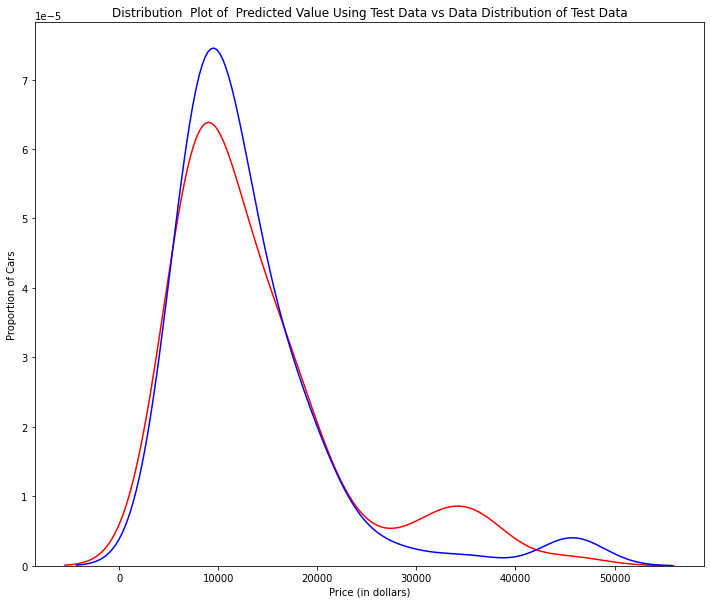

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]
:



In [48]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 4

# Ridge Regression

from sklearn.linear_model import Ridge

# Se utiliza para probar los modelos de diferentes niveles polinomiales
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)


print('\n- - - - - - - - - - - - - - - - - - - - - \n')
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))
print(':\n',)
pr1=PolynomialFeatures(degree=2)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
x_train_pr1.shape #there are now 15 features
print(':\n',)
poly1=LinearRegression().fit(x_train_pr1,y_train)
print(':\n',)


print('\n- - - - - - - - - - - - - - - - - - - - - \n')
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n') #Ridge
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])


print(':\n',)
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

print(':\n',)

In [55]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 5

# Grid Search

from sklearn.model_selection import GridSearchCV

RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1
print(':\n',)
RR=Ridge()
print('RR:\n',RR)

print('\n- - - - - - - - - - - - - - - - - - - - - \n') #Grid
Grid1 = GridSearchCV(RR, parameters1,cv=4)
print(':\n',)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
#BestRR=Grid1.best_estimator
#print('BestRR:\n',BestRR)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
#BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)
print(':\n',)
print(':\n',)


- - - - - - - - - - - - - - - - - - - - - 

:

RR:
 Ridge()

- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:


- - - - - - - - - - - - - - - - - - - - - 

:

:



In [9]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:



In [10]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:



In [11]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:



In [12]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ejercicio 

# Descripción

# 

import pandas as pd
import numpy as np

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)



- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:


- - - - - - - - - - - - - - - - - - - - - 

:

:



# Gradded Review Questions

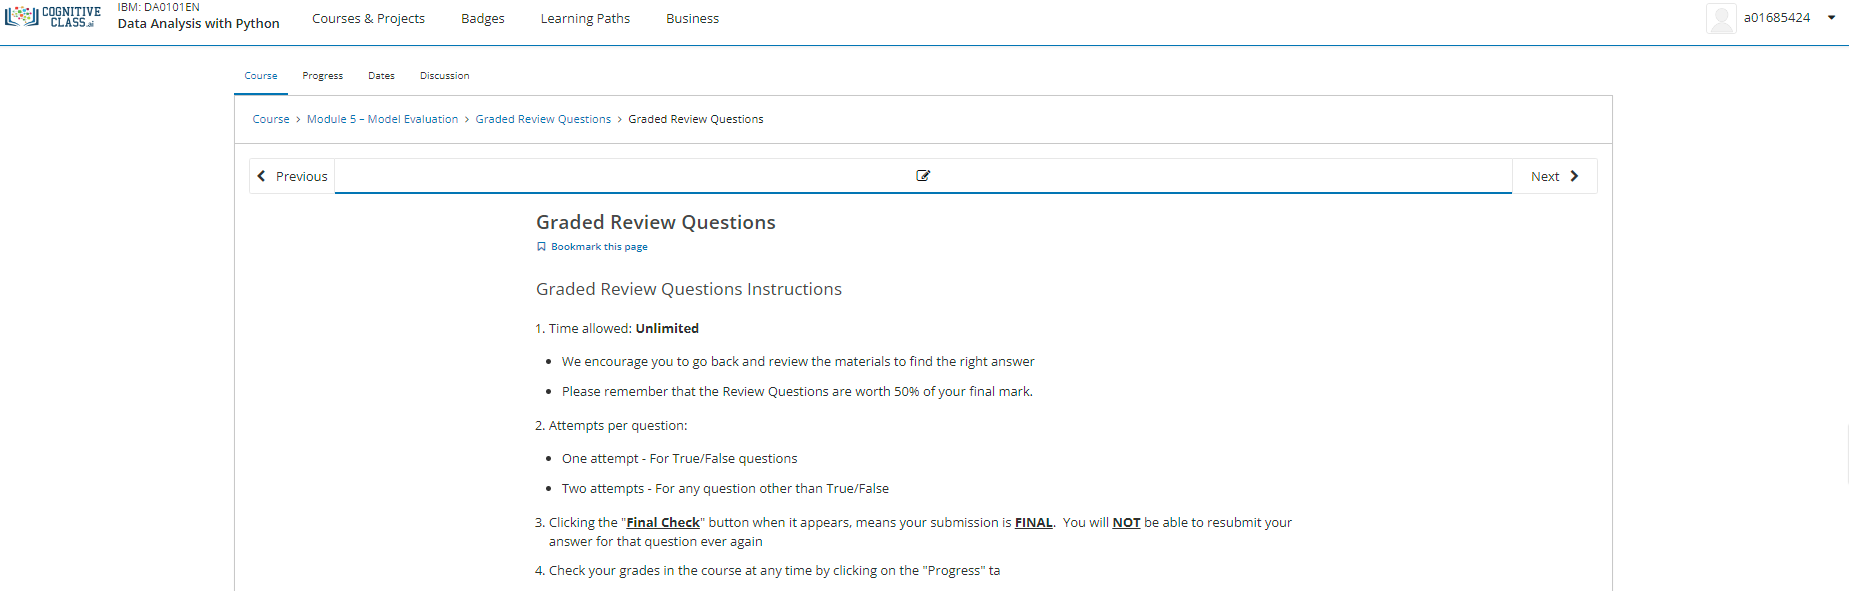

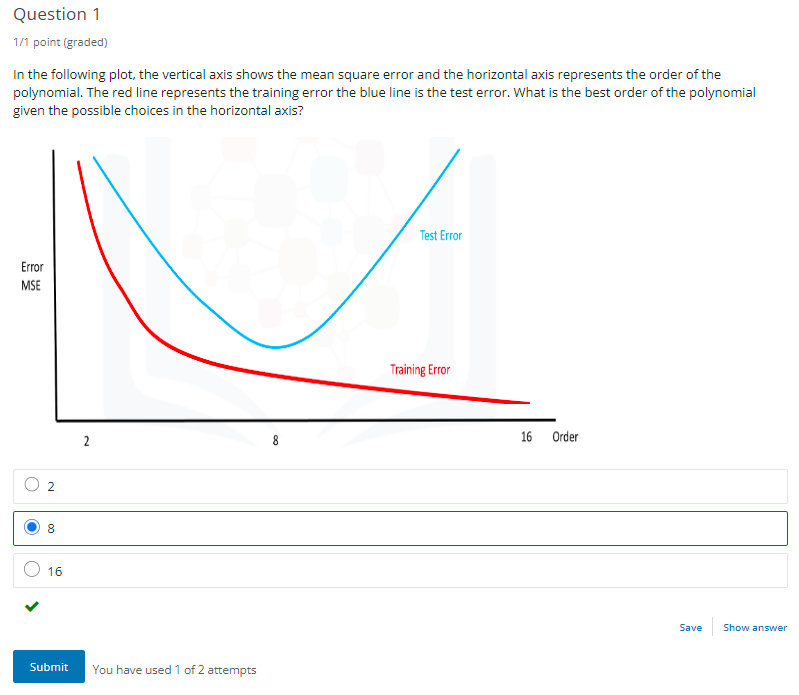

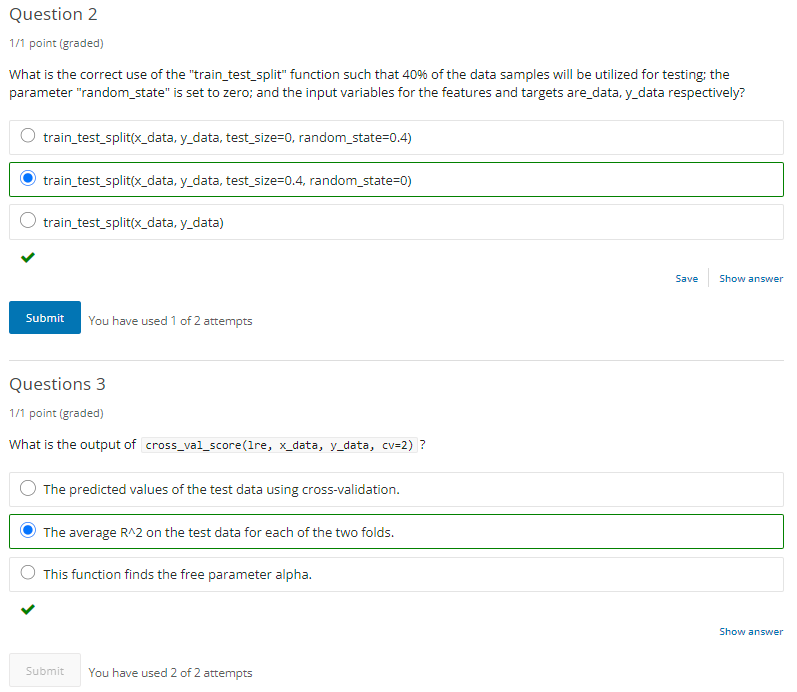

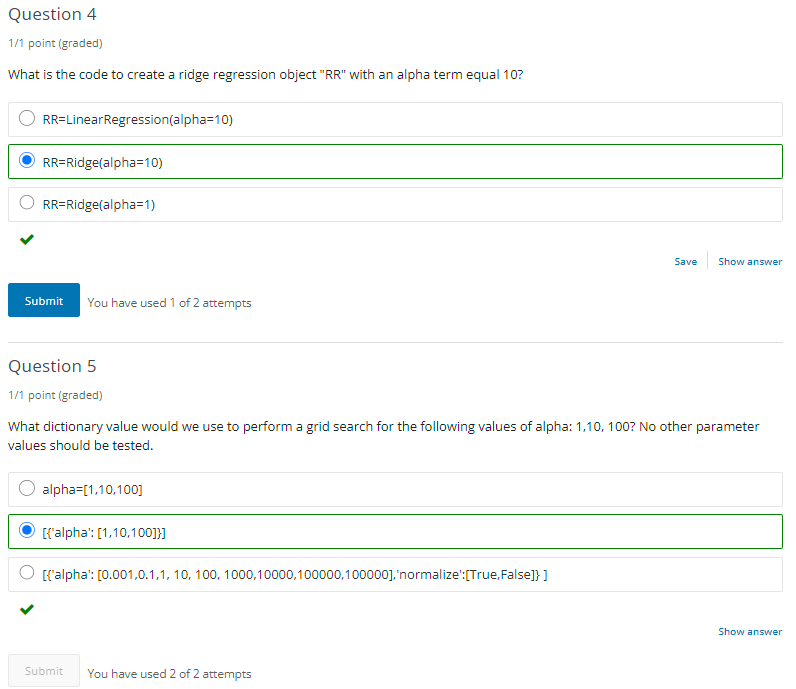


# Progress for a01685424

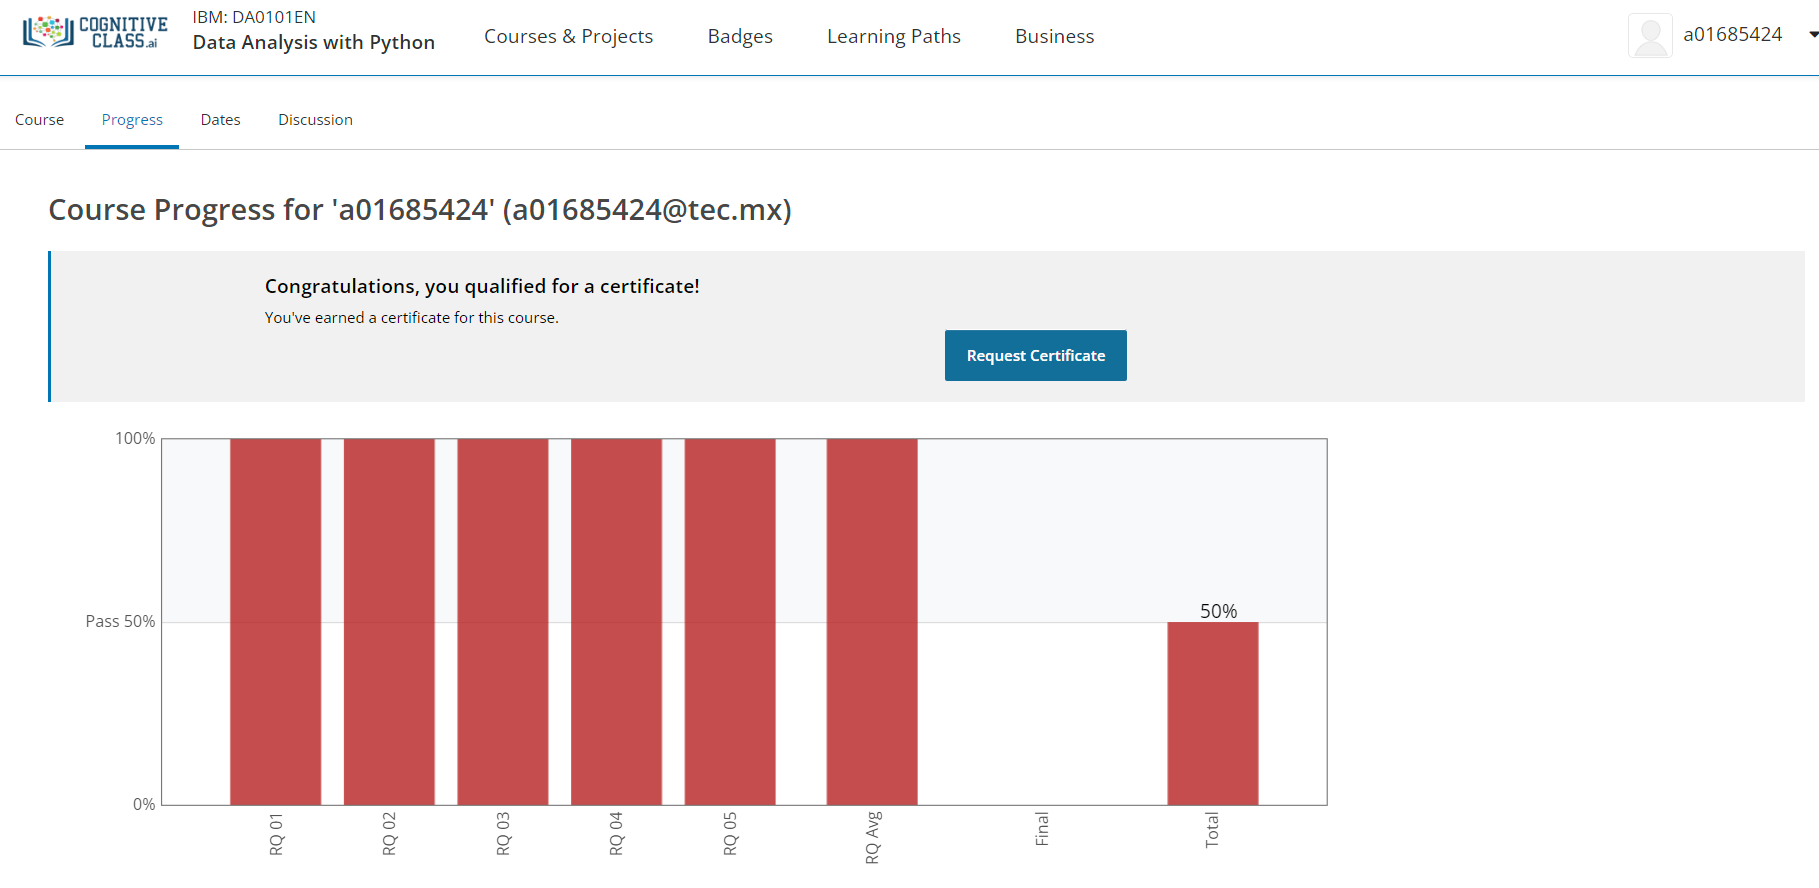